Descriptive analysis on the UNHCR data

In [1]:
import pandas as pd
from chord import Chord

df = pd.read_csv('../data/data.csv').drop('Unnamed: 0', axis=1)

Interestingly enough there are some duplicates:

In [2]:
counts = df.value_counts(subset=['Country_d','Country_o','year'])
counts[counts > 1].to_frame(name='count')

count
Country_d           Country_o                year       
Antigua and Barbuda Taiwan Province of China 2017      2
                    Dominica                 2022      2
                                             2012      2
                                             2013      2
                                             2014      2
...                                                  ...
Hong Kong SAR       Antigua and Barbuda      2023      2
                                             2024      2
Benin               Antigua and Barbuda      2012      2
                                             2011      2
Nauru               Antigua and Barbuda      2014      2

[9750 rows x 1 columns]

In [5]:
df[(df.Country_o == 'Antigua and Barbuda') & (df.Country_d == 'Taiwan Province of China') & (df.year == 2017)].newarrival

32984    0.0
32985    0.0
Name: newarrival, dtype: float64

We will have to look into why these are duplicated, it is my understanding that these shouldn't be here.

In [173]:
df.drop_duplicates(subset=['Country_o','Country_d','year'], inplace=True)

In [174]:
import numpy as np
def map_to_region(country_column):
    africa = ['The Gambia','Côte d\'Ivoire', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of Congo', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

    north_america = ['Canada', 'Mexico', 'United States', 'The Bahamas', 'Puerto Rico']

    former_soviet_union = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lithuania', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']

    south_asia = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Iran', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

    west_asia = ['Bahrain', 'Cyprus', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen', 'Islamic Republic of Iran', 'Türkiye', 'West Bank and Gaza']

    southeast_asia = ['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam', 'Lao P.D.R.']

    oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

    latin_america = ['St. Lucia', 'St. Vincent and the Grenadines', 'St. Kitts and Nevis', 'São Tomé and Príncipe', 'Aruba', 'Antigua and Barbuda', 'Argentina', 'Barbados', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela']
    europe = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Uzbekistan']
    east_asia = ['China','Hong Kong SAR','Japan','Korea', 'Macao SAR', 'Mongolia', 'Taiwan Province of China']

    region_column = []
    for country in country_column:
        if country in africa:
            region_column.append('Africa')
        elif country in north_america:
            region_column.append('North America')
        elif country in former_soviet_union:
            region_column.append('Fmr Soviet Union')
        elif country in south_asia:
            region_column.append('South Asia')
        elif country in west_asia:
            region_column.append('West Asia')
        elif country in southeast_asia:
            region_column.append('Southeast Asia')
        elif country in oceania:
            region_column.append('Oceania')
        elif country in latin_america:
            region_column.append('Latin America')
        elif country in europe:
            region_column.append('Europe')
        elif country in east_asia:
            region_column.append('East Asia')
        else:
            region_column.append(np.nan)
    return region_column

df['Region_o'] = map_to_region(df.Country_o)
df['Region_d'] = map_to_region(df.Country_d)


In [175]:
import pandas as pd
import plotly.graph_objects as go
import imageio

df_summary = df[df.year==2021].groupby(['Region_o','Region_d','year'], as_index=False).sum('newarrival')[['Region_o','Region_d','newarrival']]
df_pivot = df[df.year==2021].groupby(['Region_o','Region_d','year'], as_index=False).sum('newarrival').pivot(index='Region_d', columns='Region_o', values='newarrival')


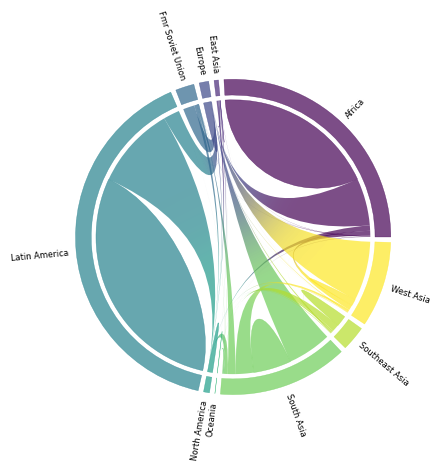

In [225]:
from mpl_chord_diagram import chord_diagram
import matplotlib.pyplot as plt

diagram = chord_diagram(df_pivot.T.values.tolist(), names=df_pivot.T.index.tolist(), directed=False, use_gradient=True, fontsize=6, show=True,rotate_names=True)
